## Proyecto final: Pico y género vs accidentes de tránsito

 Métodos Computacionales para Políticas Públicas - Universidad del Rosario
 
 Juan Diego Castro Rodríguez

## Objetivo
El presenten trabajo se plantea la meta de analizar el efecto que tuvo la política de aislamiento preventido obligatorio "pico y género" en los accidentes de tránsito en la ciudad de Bogotá-Colombia. Dicha política pública tuvo una duración de 28 días. Durante el 13 de abril hasta el 10 de mayo del 2020, los residentes de Bogotá solo podían salir durante días impares las mujeres y durante días pares los hombres (las personas transgenero de acuerdo al auto reconocimiento de su identidad de género).

### Contexto:
Bajo este panorama (14 días solo para hombres y 14 días solo para mujeres) se analizarán los datos sobre accidentes de transitos ocurridos en Bogotá durante las cuatro semanas que duró la política, incluyendo a la vez un periodo anterior y posterior al tratamiento de igual duración (4 semanas cada uno).
De igual manera, para fines de comparación se tomarán los datos durante los mismos tres periodos para Medellin, ciudad que no contó con pico y género.

### Metodología:
Se descargarán las bases de datos en formato csv, se crearán los periodos de tiempo (antes, durante y despues del tratamiento) y se analizarán los datos.

### Paso:1
Crear una función que descarge un archivo csv de la red y lo guarde en la carpeta de trabajo:

In [1]:
#Importamos librerias
import os
import requests

def download_file(url, filename):
    ''' Descargar archivo desde una url y guardarlo con un nombre específico '''
    # Comprobar si el archivo ya existe
    if not os.path.isfile(filename):
        print('Descargando archivo...')
        response = requests.get(url)
        # Comprobar si la respuesta es positiva
        if response.status_code == 200:
            #Abrir archivo y escribir contenido
            with open(filename, 'wb') as file:
                #Chuck
                for chunk in response:
                    file.write(chunk)
        print('Archivo descargado')
    else:
        #Posibilidad de que el archivo ya exista en la carpeta de trabajo
        print('El archivo ya existe')

In [2]:
url = 'http://datos-abiertos-sdm-movilidadbogota.hub.arcgis.com/datasets/b16a3f69814c40ffae63a037b8f0cbf3_0.csv?outSR={%22latestWkid%22:4686,%22wkid%22:4686}'
filename = 'Datos_Bogota.csv'
download_file(url, filename)

Descargando archivo...
Archivo descargado


### Visualizar datos

In [3]:
#Importamos librearias para visualización de datos
import pandas as pd
import matplotlib.pyplot as plt
#Definimos los parametros para el display de los dataframes
plt.rcParams["figure.figsize"] = [18.0, 10.0]
plt.style.use('ggplot')

In [4]:
Bogota = pd.read_csv('Datos_Bogota.csv')
Bogota

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,GRAVEDAD,CLASE_ACC,LOCALIDAD
0,-74.078021,4.654822,326421,A001132495,10511047,2020/02/13 00:00:00+00,2020,SOLO DANOS,CHOQUE,TEUSAQUILLO
1,-74.055914,4.693876,326429,A001133093,10510968,2020/02/13 00:00:00+00,2020,SOLO DANOS,CHOQUE,USAQUEN
2,-74.073113,4.648806,326431,A001133587,10510977,2020/02/13 00:00:00+00,2020,SOLO DANOS,CHOQUE,TEUSAQUILLO
3,-74.092693,4.602371,326438,A001132704,10510979,2020/02/13 00:00:00+00,2020,SOLO DANOS,CHOQUE,LOS MARTIRES
4,-74.112823,4.651898,326441,A001131778,10510981,2020/02/13 00:00:00+00,2020,SOLO DANOS,CHOQUE,FONTIBON
...,...,...,...,...,...,...,...,...,...,...
22678,-74.100222,4.583581,439201,A001182200,10520422,2020/09/21 00:00:00+00,2020,SOLO DANOS,CHOQUE,ANTONIO NARIÑO
22679,-74.120194,4.628970,439202,A001177799,10520441,2020/06/25 00:00:00+00,2020,SOLO DANOS,CHOQUE,PUENTE ARANDA
22680,-74.047336,4.715424,439203,A001177867,10520449,2020/06/25 00:00:00+00,2020,SOLO DANOS,CHOQUE,USAQUEN
22681,-74.123838,4.740656,439204,A001182713,10520458,2020/09/22 00:00:00+00,2020,CON HERIDOS,CHOQUE,SUBA


### Paso 2:
Definir periodos de observación:
#### Pre-tratamiento: 2020-03-16 / 2020-04-12
#### Tratamiento: 2020-04-13 / 2020-05-10
#### Pos-tratamiento: 2020-05-11 / 2020-06-07

Corregir el formato de fecha:

In [5]:
#Para limpiar los datos a utilizar
def to_day(timestamp):
    '''Toma información y reemplaza valores de minutos, horas y segundos'''
    return timestamp.replace(minute=0,hour=0, second=0)

Bogota['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(Bogota['FECHA_OCURRENCIA_ACC']).dt.date #Eliminar la información de horas minutos segundos de la columna de fecha
Bogota['FECHA_OCURRENCIA_ACC'] = pd.to_datetime(Bogota['FECHA_OCURRENCIA_ACC']) #Volver la columna a formato datetime para poder aplicar locs basados en los periodos

Bogota['Dia'] = Bogota['FECHA_OCURRENCIA_ACC'].apply(to_day)

Bogota

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,GRAVEDAD,CLASE_ACC,LOCALIDAD,Dia
0,-74.078021,4.654822,326421,A001132495,10511047,2020-02-13,2020,SOLO DANOS,CHOQUE,TEUSAQUILLO,2020-02-13
1,-74.055914,4.693876,326429,A001133093,10510968,2020-02-13,2020,SOLO DANOS,CHOQUE,USAQUEN,2020-02-13
2,-74.073113,4.648806,326431,A001133587,10510977,2020-02-13,2020,SOLO DANOS,CHOQUE,TEUSAQUILLO,2020-02-13
3,-74.092693,4.602371,326438,A001132704,10510979,2020-02-13,2020,SOLO DANOS,CHOQUE,LOS MARTIRES,2020-02-13
4,-74.112823,4.651898,326441,A001131778,10510981,2020-02-13,2020,SOLO DANOS,CHOQUE,FONTIBON,2020-02-13
...,...,...,...,...,...,...,...,...,...,...,...
22678,-74.100222,4.583581,439201,A001182200,10520422,2020-09-21,2020,SOLO DANOS,CHOQUE,ANTONIO NARIÑO,2020-09-21
22679,-74.120194,4.628970,439202,A001177799,10520441,2020-06-25,2020,SOLO DANOS,CHOQUE,PUENTE ARANDA,2020-06-25
22680,-74.047336,4.715424,439203,A001177867,10520449,2020-06-25,2020,SOLO DANOS,CHOQUE,USAQUEN,2020-06-25
22681,-74.123838,4.740656,439204,A001182713,10520458,2020-09-22,2020,CON HERIDOS,CHOQUE,SUBA,2020-09-22


Fechas de inicio y fin de cada periodo de obserbación:

In [6]:
#Crear variables que den la pauta para los periodos de observación
Fecha_inicio_pre = '2020-03-16'
Fecha_termino_pre = '2020-04-12'

Fecha_inicio_t = '2020-04-13'
Fecha_termino_t = '2020-05-10'

Fecha_inicio_pos = '2020-05-11'
Fecha_termino_pos = '2020-06-07'


#### Periodo previo al tratamiento en Bogotá

In [7]:
#Definir qué datos corresponden al periodo de interés
Pretratamiento=(Bogota['FECHA_OCURRENCIA_ACC'] >= Fecha_inicio_pre) & (Bogota['FECHA_OCURRENCIA_ACC'] <= Fecha_termino_pre) #Crear mask con los valores de las fechas del periodo en cuestión

In [8]:
#Tomar solo los datos del periodo de interés
Bogota_pre = Bogota.loc[Pretratamiento] #Crear un nuevo dataframe con las fechas filtradas
Bogota_pre

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,GRAVEDAD,CLASE_ACC,LOCALIDAD,Dia
119,-74.029787,4.715229,354788,A001135388,10514147,2020-03-17,2020,SOLO DANOS,CHOQUE,USAQUEN,2020-03-17
120,-74.122171,4.653858,354789,A001136063,10514054,2020-03-17,2020,CON HERIDOS,CHOQUE,FONTIBON,2020-03-17
121,-74.141681,4.607972,354792,A001127586,10514066,2020-03-17,2020,CON HERIDOS,ATROPELLO,KENNEDY,2020-03-17
122,-74.159009,4.633589,354794,A001136312,10514063,2020-03-17,2020,CON MUERTOS,VOLCAMIENTO,KENNEDY,2020-03-17
189,-74.154053,4.632361,355100,A001128088,10514276,2020-04-08,2020,CON MUERTOS,ATROPELLO,KENNEDY,2020-04-08
...,...,...,...,...,...,...,...,...,...,...,...
22155,0.000000,0.000000,438231,A001127754,10514606,2020-03-19,2020,SOLO DANOS,CHOQUE,KENNEDY,2020-03-19
22177,0.000000,0.000000,438275,A001135530,10514577,2020-03-19,2020,SOLO DANOS,CHOQUE,CIUDAD BOLIVAR,2020-03-19
22295,0.000000,0.000000,438508,A001133463,10514387,2020-03-19,2020,CON HERIDOS,CHOQUE,ENGATIVA,2020-03-19
22582,0.000000,0.000000,438993,A001135595,10514626,2020-03-24,2020,SOLO DANOS,CHOQUE,FONTIBON,2020-03-24


#### Periodo de tratamiento en Bogotá

In [9]:
Tratamiento =(Bogota['FECHA_OCURRENCIA_ACC'] >= Fecha_inicio_t) & (Bogota['FECHA_OCURRENCIA_ACC'] <= Fecha_termino_t)
Bogota_t = Bogota.loc[Tratamiento]
Bogota_t

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,GRAVEDAD,CLASE_ACC,LOCALIDAD,Dia
11,-74.056943,4.660060,354552,A001128303,10514995,2020-04-24,2020,CON HERIDOS,CHOQUE,ENGATIVA,2020-04-24
12,-74.075866,4.708277,354553,A001127884,10514997,2020-04-22,2020,SOLO DANOS,CHOQUE,SUBA,2020-04-22
13,-74.118745,4.581667,354554,A001128367,10515002,2020-04-25,2020,CON HERIDOS,CHOQUE,RAFAEL URIBE URIBE,2020-04-25
14,-74.121838,4.643407,354555,A001127574,10515008,2020-04-23,2020,SOLO DANOS,CHOQUE,FONTIBON,2020-04-23
15,-74.031340,4.820762,354556,A001127790,10515009,2020-04-23,2020,SOLO DANOS,CHOQUE,USAQUEN,2020-04-23
...,...,...,...,...,...,...,...,...,...,...,...
22379,-74.103315,4.706835,438635,A001181292,10519762,2020-04-15,2020,SOLO DANOS,CHOQUE,ENGATIVA,2020-04-15
22389,0.000000,0.000000,438649,A001127850,10515136,2020-04-27,2020,SOLO DANOS,CHOQUE,KENNEDY,2020-04-27
22469,0.000000,0.000000,438852,A001127666,10515464,2020-05-08,2020,CON HERIDOS,CHOQUE,KENNEDY,2020-05-08
22478,0.000000,0.000000,438873,A001136297,10514996,2020-04-21,2020,SOLO DANOS,CHOQUE,KENNEDY,2020-04-21


#### Periodo posterior al tratamiento en Bogotá

In [10]:
Postratamiento =(Bogota['FECHA_OCURRENCIA_ACC'] >= Fecha_inicio_pos) & (Bogota['FECHA_OCURRENCIA_ACC'] <= Fecha_termino_pos)
Bogota_pos = Bogota.loc[Postratamiento]
Bogota_pos

,X,Y,OBJECTID,FORMULARIO,CODIGO_ACCIDENTE,FECHA_OCURRENCIA_ACC,ANO_OCURRENCIA_ACC,GRAVEDAD,CLASE_ACC,LOCALIDAD,Dia
6851,-74.135378,4.640442,416632,A001128290,10515728,2020-05-18,2020,CON HERIDOS,CHOQUE,KENNEDY,2020-05-18
6855,-74.142534,4.580328,416646,A001135559,10515622,2020-05-11,2020,SOLO DANOS,CHOQUE,TUNJUELITO,2020-05-11
6856,-74.140048,4.630472,416650,A001175946,10515654,2020-05-16,2020,CON HERIDOS,CHOQUE,KENNEDY,2020-05-16
6990,0.000000,0.000000,416838,A001128417,10516324,2020-05-23,2020,SOLO DANOS,CHOQUE,KENNEDY,2020-05-23
6991,0.000000,0.000000,416839,A001175557,10515561,2020-05-15,2020,CON HERIDOS,ATROPELLO,BOSA,2020-05-15
...,...,...,...,...,...,...,...,...,...,...,...
22400,0.000000,0.000000,438679,A001175877,10516270,2020-05-28,2020,SOLO DANOS,CHOQUE,KENNEDY,2020-05-28
22464,0.000000,0.000000,438841,A001175889,10516429,2020-05-31,2020,SOLO DANOS,CHOQUE,KENNEDY,2020-05-31
22465,0.000000,0.000000,438843,A001128514,10515632,2020-05-12,2020,CON HERIDOS,VOLCAMIENTO,SUBA,2020-05-12
22581,0.000000,0.000000,438991,A001176311,10516388,2020-05-29,2020,SOLO DANOS,CHOQUE,KENNEDY,2020-05-29


### Paso 3: Observar variaciones por periodo y día

In [11]:
Accidentes_pre_bog = Bogota_pre.groupby('Dia') #Agrupar datos entorno al día de ocurrencia
Contador_Accidentes_pre_bog = Accidentes_pre_bog['OBJECTID'].agg('count') #Añandir un contador de los accidentes
Contador_Accidentes_pre_bog.to_frame()


,OBJECTID
Dia,
2020-03-16,76
2020-03-17,62
2020-03-18,77
2020-03-19,70
2020-03-20,14
2020-03-21,4
2020-03-22,8
2020-03-23,5
2020-03-24,34


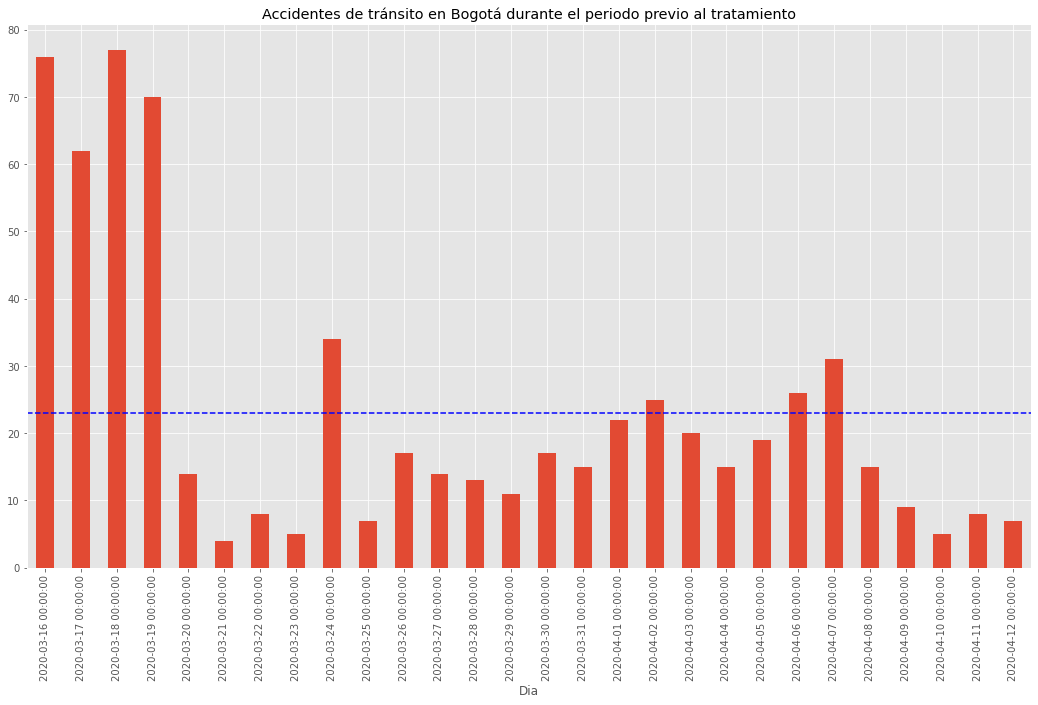

In [12]:
#Graficar el contador de accidentes por día
Contador_Accidentes_pre_bog.plot(kind='bar')
mean = Contador_Accidentes_pre_bog.mean() #Calcula la media del número de accidentes
plt.title('Accidentes de tránsito en Bogotá durante el periodo previo al tratamiento')
plt.axhline(mean, color='b', linestyle='--')
plt.savefig('Accidentes_Bogotá_pre_tratamiento.png');#Guarda el gráfico como una imagen en formato .png

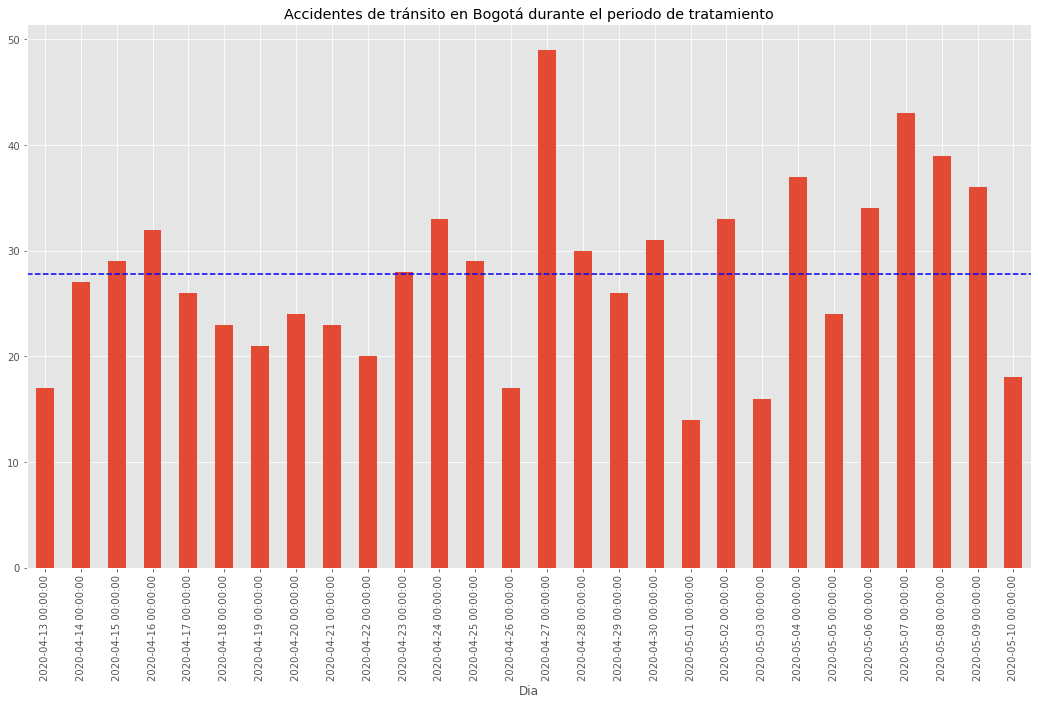

In [13]:
Accidentes_t_bog = Bogota_t.groupby('Dia')
Contador_Accidentes_t_bog = Accidentes_t_bog['OBJECTID'].agg('count')
Contador_Accidentes_t_bog.plot(kind='bar')
mean = Contador_Accidentes_t_bog.mean()
plt.title('Accidentes de tránsito en Bogotá durante el periodo de tratamiento')
plt.axhline(mean, color='b', linestyle='--')
plt.savefig('Accidentes_Bogotá_tratamiento.png');

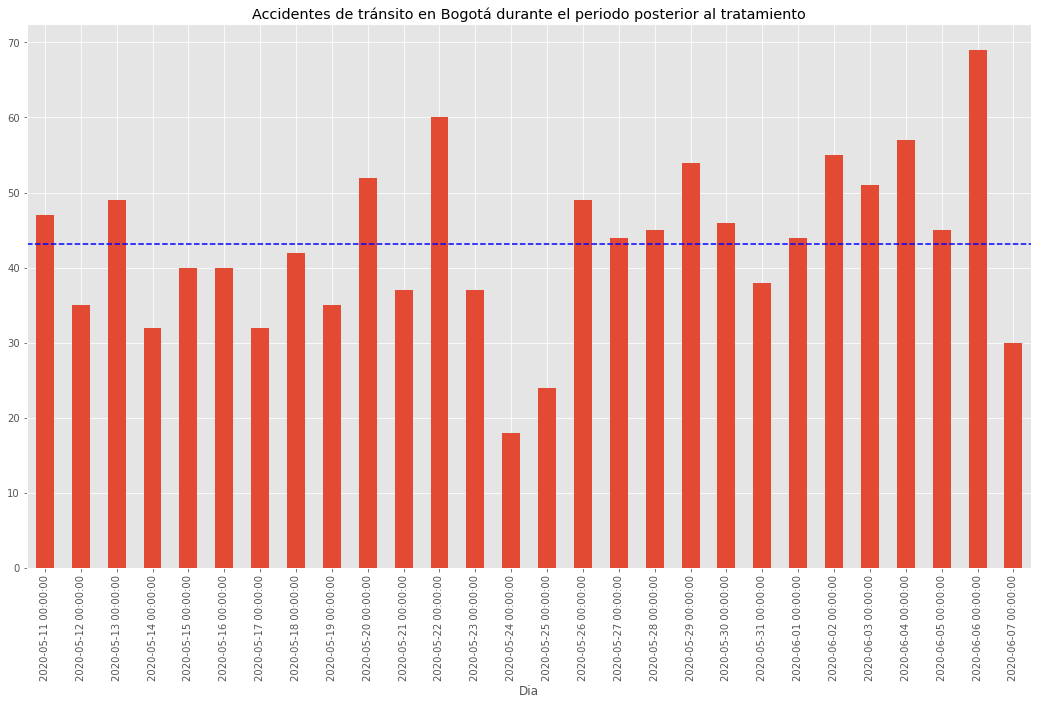

In [14]:
Accidentes_pos_bog = Bogota_pos.groupby('Dia')
Contador_Accidentes_pos_bog = Accidentes_pos_bog['OBJECTID'].agg('count')
Contador_Accidentes_pos_bog.plot(kind='bar')
mean = Contador_Accidentes_pos_bog.mean()
plt.title('Accidentes de tránsito en Bogotá durante el periodo posterior al tratamiento')
plt.axhline(mean, color='b', linestyle='--')
plt.savefig('Accidentes_Bogotá_pos_tratamiento.png');

### Más gráficos

In [15]:
Loc_accidentes_pre_bog = Bogota_pre.groupby('LOCALIDAD') #Agrupar datos entorno a su localidad
Contador_Loc_accidentes_pre_bog = Loc_accidentes_pre_bog['OBJECTID'].agg('count') #Añandir un contador de los accidentes
Contador_Loc_accidentes_pre_bog.to_frame()

,OBJECTID
LOCALIDAD,
ANTONIO NARIÑO,8
BARRIOS UNIDOS,33
BOSA,43
CANDELARIA,5
CHAPINERO,33
CIUDAD BOLIVAR,34
ENGATIVA,49
FONTIBON,53
KENNEDY,85


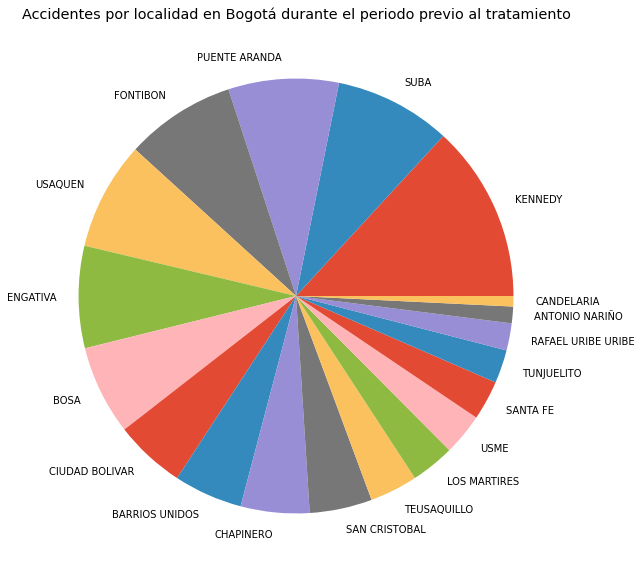

In [16]:
Contador_Loc_accidentes_pre_bog=Contador_Loc_accidentes_pre_bog.sort_values(ascending=False)
Contador_Loc_accidentes_pre_bog.plot(kind='pie')
plt.title('Accidentes por localidad en Bogotá durante el periodo previo al tratamiento')
plt.ylabel('')
plt.savefig('Accidentes_Loc_Bogotá_pre_tratamiento.png');

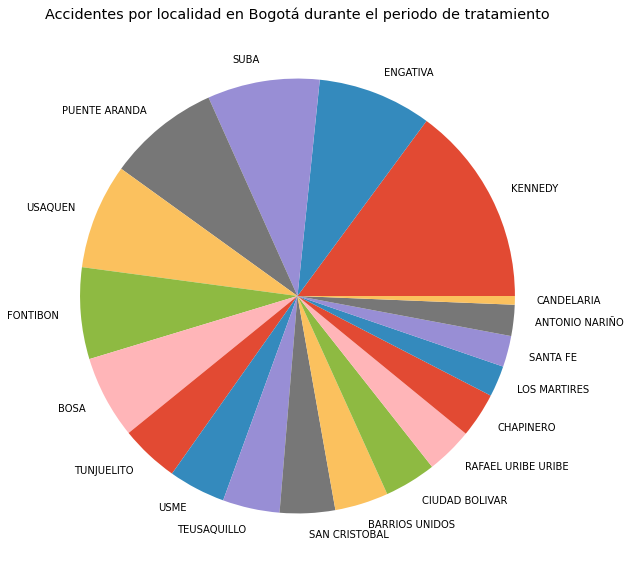

In [17]:
Loc_accidentes_t_bog = Bogota_t.groupby('LOCALIDAD') 
Contador_Loc_accidentes_t_bog = Loc_accidentes_t_bog['OBJECTID'].agg('count') 
Contador_Loc_accidentes_t_bog=Contador_Loc_accidentes_t_bog.sort_values(ascending=False)
Contador_Loc_accidentes_t_bog.plot(kind='pie')
plt.title('Accidentes por localidad en Bogotá durante el periodo de tratamiento')
plt.ylabel('')
plt.savefig('Accidentes_Loc_Bogotá_tratamiento.png');

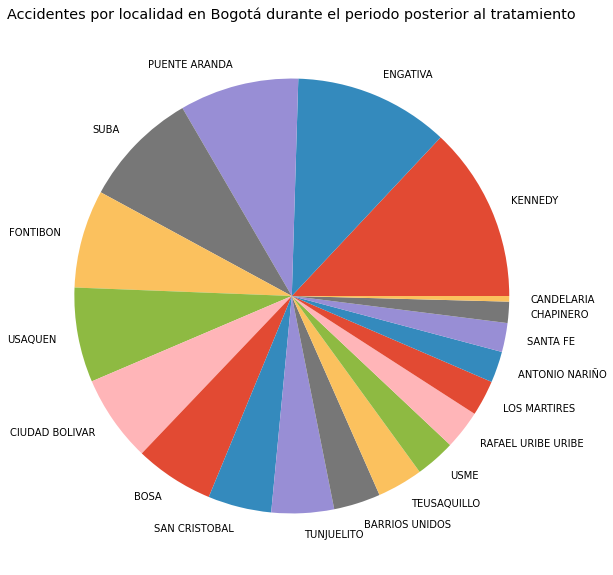

In [18]:
Loc_accidentes_pos_bog = Bogota_pos.groupby('LOCALIDAD') 
Contador_Loc_accidentes_pos_bog = Loc_accidentes_pos_bog['OBJECTID'].agg('count') 
Contador_Loc_accidentes_pos_bog=Contador_Loc_accidentes_pos_bog.sort_values(ascending=False)
Contador_Loc_accidentes_pos_bog.plot(kind='pie')
plt.title('Accidentes por localidad en Bogotá durante el periodo posterior al tratamiento')
plt.ylabel('')
plt.savefig('Accidentes_Loc_Bogotá_pos_tratamiento.png');

### Paso 4: Repetir procedimiento con datos para medellin

In [19]:
url_1 = 'https://opendata.arcgis.com/datasets/f3e14868231f4bbd825968203de64e48_24.csv'
filename_1 = 'Datos_Medellin.csv'
download_file(url_1, filename_1)

Descargando archivo...
Archivo descargado


In [20]:
Medellin = pd.read_csv('Datos_Medellin.csv')

Medellin['FECHA'] = pd.to_datetime(Medellin['FECHA']).dt.date #Eliminar la información de horas minutos segundos de la columna de fecha
Medellin['FECHA'] = pd.to_datetime(Medellin['FECHA']) #Volver la columna a formato datetime para poder aplicar locs basados en los periodos

Medellin['Dia'] = Medellin['FECHA'].apply(to_day)

Fecha_inicio_pre = '2020-03-16'
Fecha_termino_pre = '2020-04-12'

Fecha_inicio_t = '2020-04-13'
Fecha_termino_t = '2020-05-10'

Fecha_inicio_pos = '2020-05-11'
Fecha_termino_pos= '2020-06-07'



#### Periodo pre tratamiento en Medellin

In [21]:
Pretratamiento_M=(Medellin['FECHA'] >= Fecha_inicio_pre) & (Medellin['FECHA'] <= Fecha_termino_pre) #Crear mask con los valores de las fechas del periodo en cuestión
Medellin_pre = Medellin.loc[Pretratamiento_M] #Crear un nuevo dataframe con las fechas filtradas
Medellin_pre

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD,Dia
4,-75.576423,6.253848,826034,1712988,2020-04-05,02:00:00,5,2020,Choque,CR 62 CL 50,...,La Candelaria,Tramo de via,DOMINGO,4,ABRIL,834101.73,1183542.28,-75.576423,6.253848,2020-04-05
9,-75.571647,6.265103,826039,1712414,2020-03-20,02:30:00,20,2020,Choque,CL 67 CR 62,...,La Candelaria,Tramo de via,VIERNES,3,MARZO,834630.38,1184787.31,-75.571647,6.265103,2020-03-20
20,-75.583891,6.289924,826050,1712756,2020-03-30,05:00:00,30,2020,Atropello,CR 79 A CL 92,...,Doce de Octubre,Tramo de via,LUNES,3,MARZO,833275.24,1187532.82,-75.583891,6.289924,2020-03-30
36,-75.575140,6.256581,826066,1712491,2020-03-21,06:10:00,21,2020,Choque,CR 62 CL 54,...,La Candelaria,Lote o Predio,SÁBADO,3,MARZO,834243.74,1183844.67,-75.575140,6.256581,2020-03-21
41,-75.558520,6.309070,826071,1712961,2020-04-07,12:00:00,7,2020,Choque,CR 64 AA CL 114,...,Castilla,Tramo de via,MARTES,4,ABRIL,836083.29,1189650.60,-75.558520,6.309070,2020-04-07
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31598,-75.573390,6.272546,857628,1712416,2020-03-20,02:25:00,20,2020,Choque,CR 64 C CL 74,...,Castilla,Tramo de via,VIERNES,3,MARZO,834437.54,1185610.51,-75.573390,6.272546,2020-03-20
31609,-75.540813,6.297947,857639,1712873,2020-04-11,05:00:00,11,2020,Otro,CR 28 E CL 108,...,Popular,Tramo de via,SÁBADO,4,ABRIL,838043.08,1188420.31,-75.540813,6.297947,2020-04-11
31637,-75.567543,6.199438,857667,1711710,2020-03-16,04:10:00,16,2020,Choque,CR 35 CL 2 Sur,...,El Poblado,Interseccion,LUNES,3,MARZO,835084.59,1177523.80,-75.567543,6.199438,2020-03-16
31643,-75.564007,6.226985,857673,1712463,2020-03-18,05:30:00,18,2020,Choque,CR 37 A CL 29,...,Buenos Aires,Tramo de via,MIÉRCOLES,3,MARZO,835476.02,1180570.83,-75.564007,6.226985,2020-03-18


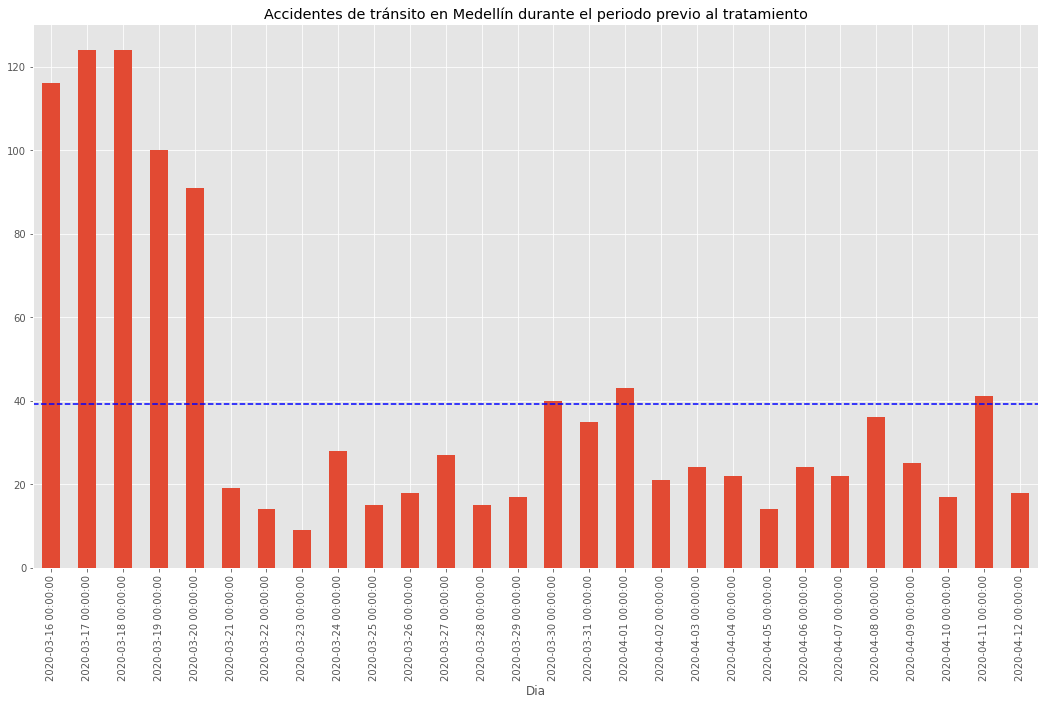

In [22]:
Accidentes_pre_med = Medellin_pre.groupby('Dia')
Contador_Accidentes_pre_med = Accidentes_pre_med['OBJECTID'].agg('count')
Contador_Accidentes_pre_med.plot(kind='bar')
mean = Contador_Accidentes_pre_med.mean()
plt.axhline(mean, color='b', linestyle='--')
plt.title('Accidentes de tránsito en Medellín durante el periodo previo al tratamiento')
plt.savefig('Accidentes_Medellín_pre_tratamiento.png');

#### Periodo de tratamiento en Medellin

In [23]:
Tratamiento_M =(Medellin['FECHA'] >= Fecha_inicio_t) & (Medellin['FECHA'] <= Fecha_termino_t)
Medellin_t = Medellin.loc[Tratamiento_M]
Medellin_t

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD,Dia
1,-75.558959,6.244545,826031,1714151,2020-05-08,11:30:00,8,2020,Choque,CR 38 CL 49 A,...,La Candelaria,Tramo de via,VIERNES,5,MAYO,836034.83,1182513.26,-75.558959,6.244545,2020-05-08
6,-75.576194,6.212725,826036,1713748,2020-04-27,07:30:00,27,2020,Atropello,CR 49 CL 7,...,El Poblado,Lote o Predio,LUNES,4,ABRIL,834126.97,1178993.58,-75.576194,6.212725,2020-04-27
38,-75.541921,6.249769,826068,1713930,2020-05-07,05:20:00,7,2020,Caida Ocupante,CL 57 A CR 19,...,Villa Hermosa,Lote o Predio,JUEVES,5,MAYO,837920.67,1183091.19,-75.541921,6.249769,2020-05-07
70,-75.566048,6.260764,826100,1713971,2020-05-02,12:00:00,2,2020,Choque,CL 62 CR 51 D,...,La Candelaria,Tramo de via,SÁBADO,5,MAYO,835250.11,1184307.25,-75.566048,6.260764,2020-05-02
91,-75.557076,6.265536,826121,1713786,2020-05-02,02:00:00,2,2020,Choque,CR 47 A CL 70,...,Aranjuez,Tramo de via,SÁBADO,5,MAYO,836243.21,1184835.15,-75.557076,6.265536,2020-05-02
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31521,-75.560854,6.286027,857551,1713406,2020-04-30,11:00:00,30,2020,Choque,CR 51 CL 94 D,...,Aranjuez,Tramo de via,JUEVES,4,ABRIL,835825.01,1187101.79,-75.560854,6.286027,2020-04-30
31570,-75.703816,6.221806,857600,1713219,2020-04-17,04:15:00,17,2020,Choque,CR 999 CL 999,...,Sin Inf,Tramo de via,VIERNES,4,ABRIL,820000.00,1180000.00,-75.703816,6.221806,2020-04-17
31611,-75.540802,6.231992,857641,1713728,2020-04-29,10:40:00,29,2020,Choque,CR 12 CL 45 D,...,Buenos Aires,Interseccion,MIÉRCOLES,4,ABRIL,838044.64,1181124.81,-75.540802,6.231992,2020-04-29
31679,-75.566822,6.225415,857709,1713457,2020-04-23,05:15:00,23,2020,Caida Ocupante,CL 28 CR 40,...,La Candelaria,Tramo de via,JUEVES,4,ABRIL,835164.50,1180397.18,-75.566822,6.225415,2020-04-23


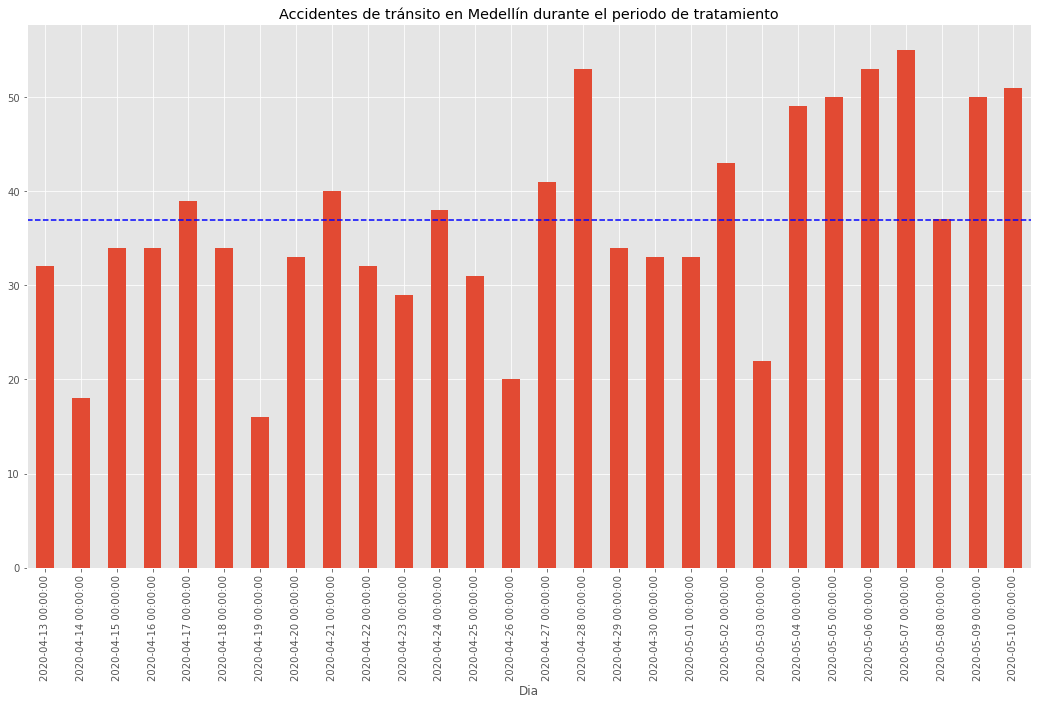

In [24]:
Accidentes_t_med = Medellin_t.groupby('Dia')
Contador_Accidentes_t_med = Accidentes_t_med['OBJECTID'].agg('count')
Contador_Accidentes_t_med.plot(kind='bar')
mean = Contador_Accidentes_t_med.mean()
plt.axhline(mean, color='b', linestyle='--')
plt.title('Accidentes de tránsito en Medellín durante el periodo de tratamiento')
plt.savefig('Accidentes_Medellín_tratamiento.png');

#### Periodo postratamiento Medellin

In [25]:
Postratamiento_M =(Medellin['FECHA'] >= Fecha_inicio_pos) & (Medellin['FECHA'] <= Fecha_termino_pos)
Medellin_pos = Medellin.loc[Postratamiento_M]
Medellin_pos

,X,Y,OBJECTID,RADICADO,FECHA,HORA,DIA,PERIODO,CLASE,DIRECCION,...,COMUNA,DISENO,DIA_NOMBRE,MES,MES_NOMBRE,X_MAGNAMED,Y_MAGNAMED,LONGITUD,LATITUD,Dia
18,-75.575461,6.244944,826048,1715397,2020-05-31,03:00:00,31,2020,Otro,CL 44 CR 57 A,...,La Candelaria,Tramo de via,DOMINGO,5,MAYO,834208.26,1182557.44,-75.575461,6.244944,2020-05-31
46,-75.703816,6.221806,826076,1714218,2020-05-13,06:30:00,13,2020,Choque,CL 72 CR 22,...,Sin Inf,Tramo de via,MIÉRCOLES,5,MAYO,820000.00,1180000.00,-75.703816,6.221806,2020-05-13
52,-75.575233,6.250168,826082,1715880,2020-06-04,03:02:00,4,2020,Choque,CL 48 CR 57,...,La Candelaria,Tramo de via,JUEVES,6,JUNIO,834233.42,1183135.28,-75.575233,6.250168,2020-06-04
72,-75.583028,6.212489,826102,1714216,2020-05-13,09:15:00,13,2020,Otro,CR 52 CL 7,...,Guayabal,Lote o Predio,MIÉRCOLES,5,MAYO,833370.53,1178967.45,-75.583028,6.212489,2020-05-13
90,-75.544918,6.282353,826120,1714949,2020-05-24,02:45:00,24,2020,Atropello,CL 92 CR 33,...,Manrique,Tramo de via,DOMINGO,5,MAYO,837588.88,1186695.33,-75.544918,6.282353,2020-05-24
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31684,-75.703816,6.221806,857714,1715855,2020-06-06,10:30:00,6,2020,Choque,CL 33 CR 55,...,Sin Inf,Glorieta,SÁBADO,6,JUNIO,820000.00,1180000.00,-75.703816,6.221806,2020-06-06
31699,-75.645746,6.174431,857729,1715384,2020-05-31,08:00:00,31,2020,Choque,CL 55 Sur CR 68 C,...,Corregimiento de San Antonio de Prado,Tramo de via,DOMINGO,5,MAYO,826427.22,1174758.43,-75.645746,6.174431,2020-05-31
31710,-75.591019,6.285256,857740,1714726,2020-05-20,08:00:00,20,2020,Choque,CL 77 DD CR 88,...,Robledo,Lote o Predio,MIÉRCOLES,5,MAYO,832486.27,1187016.47,-75.591020,6.285255,2020-05-20
31714,-75.548707,6.238713,857744,1714480,2020-05-16,10:00:00,16,2020,Otro,CL 49 CR 25,...,Buenos Aires,Tramo de via,SÁBADO,5,MAYO,837169.63,1181868.17,-75.548707,6.238713,2020-05-16


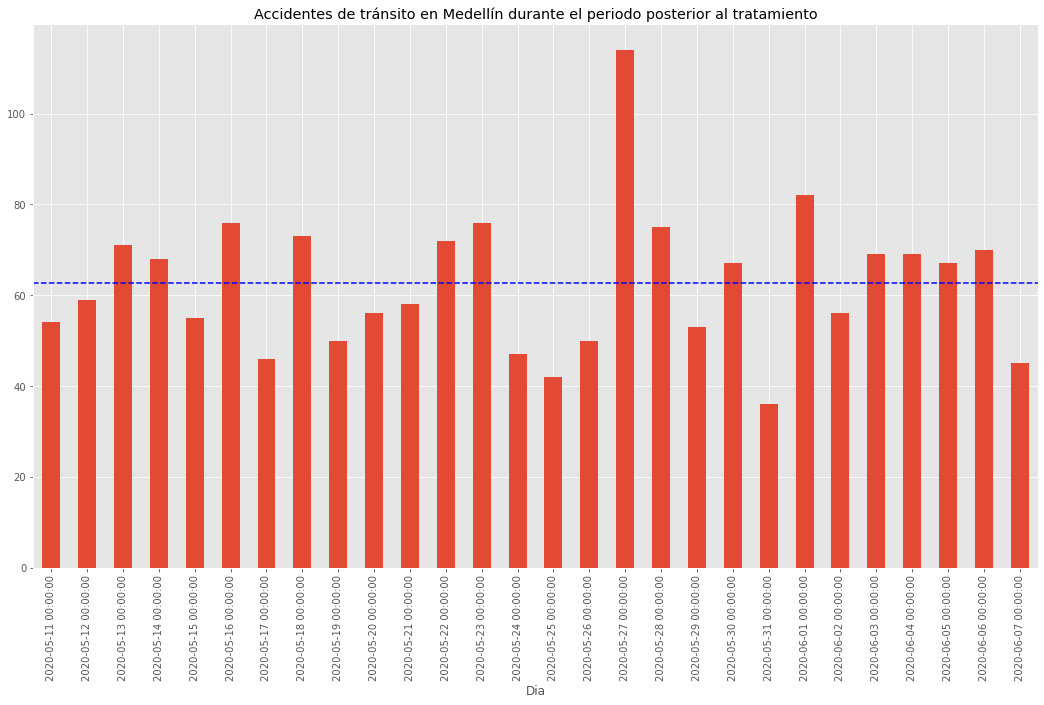

In [26]:
Accidentes_pos_med = Medellin_pos.groupby('Dia')
Contador_Accidentes_pos_med = Accidentes_pos_med['OBJECTID'].agg('count')
Contador_Accidentes_pos_med.plot(kind='bar')
mean = Contador_Accidentes_pos_med.mean()
plt.axhline(mean, color='b', linestyle='--')
plt.title('Accidentes de tránsito en Medellín durante el periodo posterior al tratamiento')
plt.savefig('Accidentes_Medellín_pos_tratamiento.png');

### Más gráficos

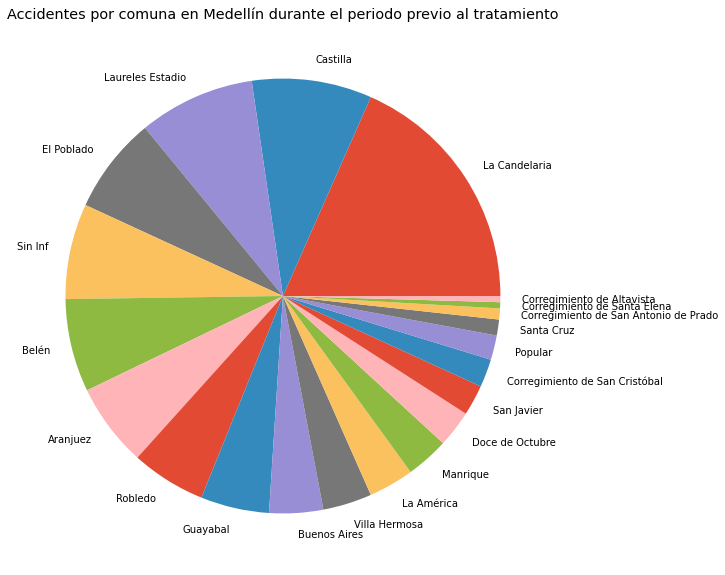

In [27]:
Com_accidentes_pre_med = Medellin_pre.groupby('COMUNA') 
Contador_Com_accidentes_pre_med = Com_accidentes_pre_med['OBJECTID'].agg('count') 
Contador_Com_accidentes_pre_med=Contador_Com_accidentes_pre_med.sort_values(ascending=False)
Contador_Com_accidentes_pre_med.plot(kind='pie')
plt.title('Accidentes por comuna en Medellín durante el periodo previo al tratamiento')
plt.ylabel('')
plt.savefig('Accidentes_Com_Medellín_pre_tratamiento.png');

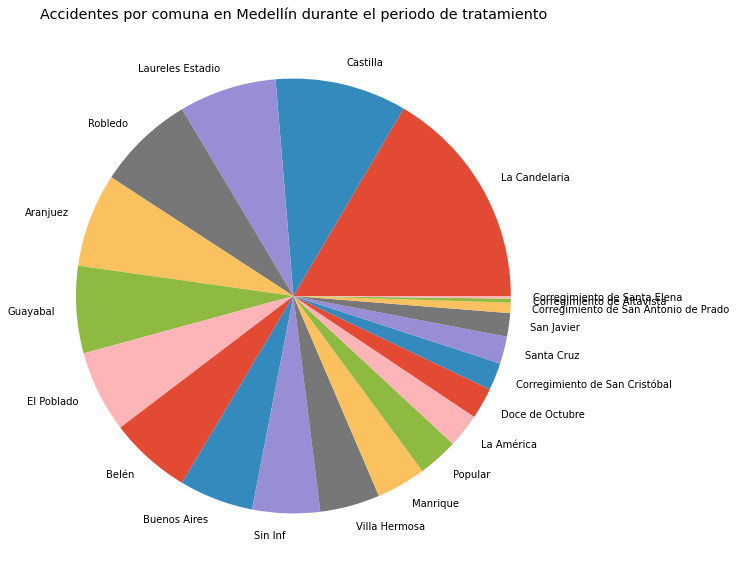

In [28]:
Com_accidentes_t_med = Medellin_t.groupby('COMUNA') 
Contador_Com_accidentes_t_med = Com_accidentes_t_med['OBJECTID'].agg('count') 
Contador_Com_accidentes_t_med=Contador_Com_accidentes_t_med.sort_values(ascending=False)
Contador_Com_accidentes_t_med.plot(kind='pie')
plt.title('Accidentes por comuna en Medellín durante el periodo de tratamiento')
plt.ylabel('')
plt.savefig('Accidentes_Com_Medellín_t_tratamiento.png');

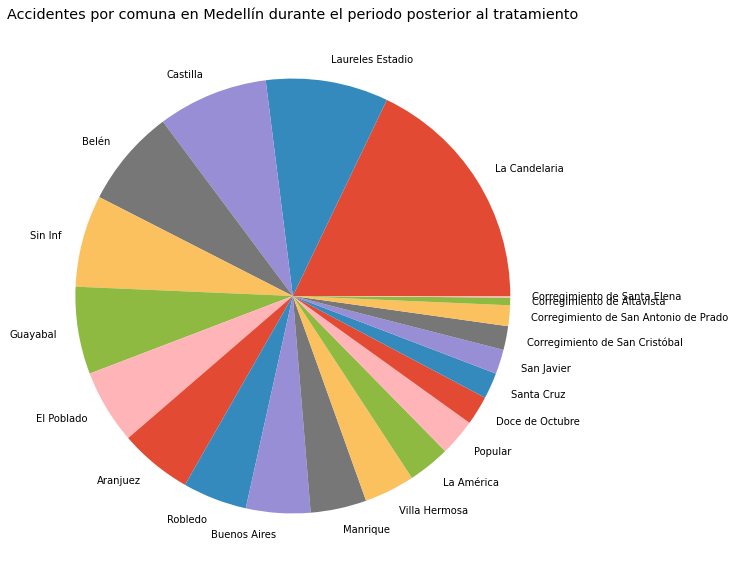

In [29]:
Com_accidentes_pos_med = Medellin_pos.groupby('COMUNA') 
Contador_Com_accidentes_pos_med = Com_accidentes_pos_med['OBJECTID'].agg('count') 
Contador_Com_accidentes_pos_med=Contador_Com_accidentes_pos_med.sort_values(ascending=False)
Contador_Com_accidentes_pos_med.plot(kind='pie')
plt.title('Accidentes por comuna en Medellín durante el periodo posterior al tratamiento')
plt.ylabel('')
plt.savefig('Accidentes_Com_Medellín_pos_tratamiento.png');